In [4]:
%pylab inline
import seaborn as sns
import pandas as pd
import time

# still working on this
# from mpl_toolkits.basemap import Basemap

sns.set_style('white')
pd.set_option('display.max_columns', 35)

Populating the interactive namespace from numpy and matplotlib


# Reading in Data

In [15]:
print "Starting to read in data..."
t1 = time.time()
requests = pd.read_csv('311__Service_Requests.csv')
t2 = time.time()
print "Read in data in %.2f seconds." % (t2 - t1)

Starting to read in data...
Read in data in 20.16 seconds.


In [20]:
# processing on the data types
print "Starting to process data types..."
t1 = time.time()
for col in ['OPEN_DT', 'TARGET_DT', 'CLOSED_DT']:
    requests[col] = pd.to_datetime(requests[col])
t2= time.time()
print "Dates processed in %.2f seconds." % (t2-t1)


Starting to process data types...
Dates processed in 2918.69 seconds.


In [7]:
requests.describe()

,CASE_ENQUIRY_ID,fire_district,city_council_district,neighborhood_services_district,LOCATION_ZIPCODE,Property_ID,LATITUDE,LONGITUDE
count,7.414790e+05,705302.000000,708094.000000,708093.000000,569199.000000,708248.000000,741479.000000,741479.000000
mean,1.010010e+11,7.245801,4.675104,8.972152,2127.478086,100775.067798,42.324841,-71.085479
std,4.359690e+05,3.280281,2.550621,4.172519,17.785509,95373.252851,0.035126,0.036447
min,1.010003e+11,1.000000,0.000000,0.000000,2026.000000,1.000000,42.232100,-71.185400
25%,1.010007e+11,4.000000,2.000000,6.000000,2121.000000,16592.750000,42.293800,-71.111700
50%,1.010011e+11,7.000000,5.000000,10.000000,2126.000000,82519.000000,42.331400,-71.075900
75%,1.010014e+11,9.000000,7.000000,13.000000,2131.000000,145504.000000,42.355800,-71.058700
max,1.010018e+11,12.000000,9.000000,15.000000,2467.000000,419841.000000,42.395200,-70.994900


In [8]:
requests.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,TYPE,QUEUE,Department,SubmittedPhoto,ClosedPhoto,Location,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
0,101000295613,2011-07-01 01:32:33,2011-07-15 01:32:32,2011-07-01 05:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,NaN,NaN,INTERSECTION of Groveland St & River St Matta...,8,07,3,B3,Greater Mattapan,7,Ward 17,1714,NaN,INTERSECTION Groveland St & River St,NaN,Intersection,5512,42.2715,-71.0772,Employee Generated,"(42.2715, -71.0772)"
1,101000295614,2011-07-01 02:18:31,2011-07-05 02:18:31,2011-07-01 06:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,NaN,NaN,39 Lorraine St Roslindale MA 02131,12,06,5,E5,Roslindale,10,Ward 20,2008,R1,39 Lorraine St,2131,Address,87461,42.2839,-71.1447,Self Service,"(42.2839, -71.1447)"
2,101000295615,2011-07-01 02:28:04,2011-08-15 02:28:04,2011-08-01 15:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,NaN,NaN,INTERSECTION of Corey St & Lagrange St West R...,NaN,06,6,E5,West Roxbury,12,Ward 20,2017,NaN,INTERSECTION Corey St & Lagrange St,NaN,Intersection,3522,42.3003,-71.1698,Self Service,"(42.3003, -71.1698)"
3,101000295616,2011-07-01 03:03:48,2011-07-15 03:03:48,2011-07-22 16:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,NaN,NaN,235 Fairmount Ave Hyde Park MA 02136,12,08,5,E18,Hyde Park,10,Ward 18,1816,R2,235 Fairmount Ave,2136,Address,55708,42.2496,-71.1156,Self Service,"(42.2496, -71.1156)"
4,101000295617,2011-07-01 03:12:31,NaT,2011-07-01 06:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,NaN,NaN,INTERSECTION of Dorchester Ave & Hallam St Do...,7,03,3,C11,Dorchester,7,Ward 13,1309,NaN,INTERSECTION Dorchester Ave & Hallam St,NaN,Intersection,4182,42.3144,-71.0569,Constituent Call,"(42.3144, -71.0569)"


In [19]:
requests.dtypes

CASE_ENQUIRY_ID                     int64
OPEN_DT                            object
TARGET_DT                          object
CLOSED_DT                          object
OnTime_Status                      object
CASE_STATUS                        object
CLOSURE_REASON                     object
CASE_TITLE                         object
SUBJECT                            object
REASON                             object
TYPE                               object
QUEUE                              object
Department                         object
SubmittedPhoto                     object
ClosedPhoto                        object
Location                           object
fire_district                     float64
pwd_district                       object
city_council_district             float64
police_district                    object
neighborhood                       object
neighborhood_services_district    float64
ward                               object
precinct                          

In [10]:
closed_requests = requests[requests['CASE_STATUS'] == 'Closed']
open_requests = requests[requests['CASE_STATUS'] == 'Open']
print "There are %i open and %i closed requests." % (len(open_requests), len(closed_requests))

There are 58494 open and 682985 closed requests.


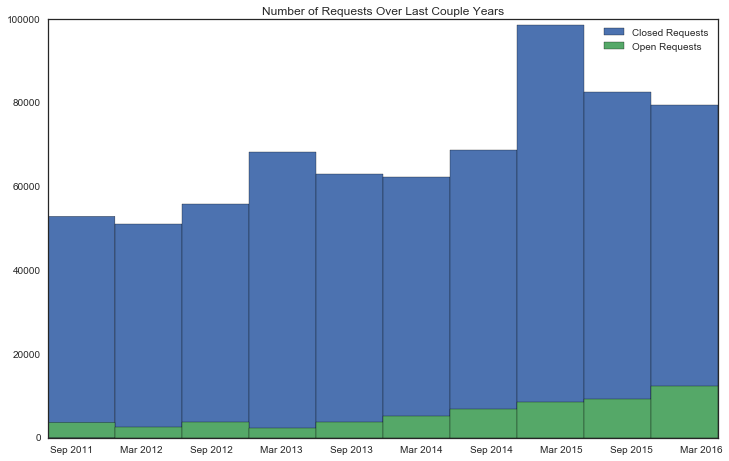

In [11]:
plt.figure(figsize=[12,7.5])
plt.title("Number of Requests Over Last Couple Years")
plt.hist(closed_requests['OPEN_DT'].values, label='Closed Requests')
plt.hist(open_requests['OPEN_DT'].values, label='Open Requests')
plt.legend()

(array([ 602861.,   28199.,   11614.,    7270.,    5486.,    4018.,
           3186.,    2991.,    2330.,    2161.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

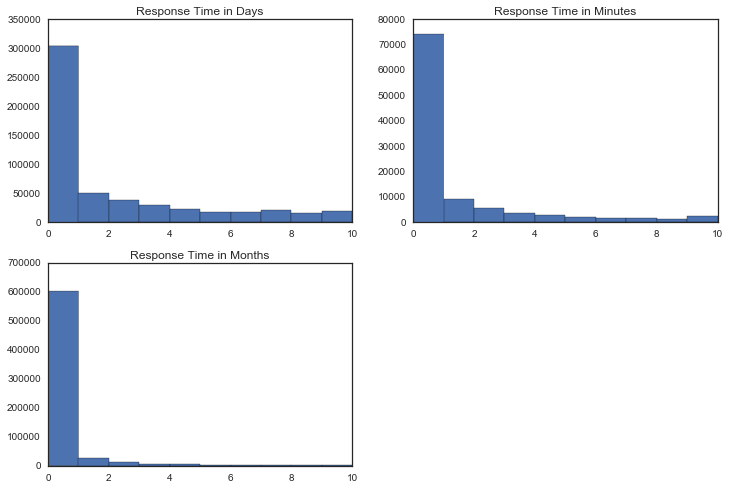

In [12]:
plt.figure(figsize=[12,8])
plt.subplot(221)
plt.title('Response Time in Days')
delays = closed_requests['CLOSED_DT'] - closed_requests['OPEN_DT']
plt.hist(delays.astype('timedelta64[D]'), range=(0,10))
plt.subplot(222)
plt.title('Response Time in Minutes')
plt.hist(delays.astype('timedelta64[m]'), range=(0,10))
plt.subplot(223)
plt.title("Response Time in Months")
plt.hist(delays.astype('timedelta64[D]')/31, range=(0,10))

1433


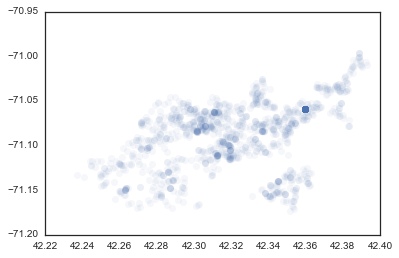

In [13]:
begin = pd.to_datetime('March 15, 2014 12:00PM')
end = pd.to_datetime('March 19, 2014 12:00PM')

in_range = requests[requests['OPEN_DT'] > begin]
in_range = in_range[in_range['OPEN_DT'] < end]

print len(in_range)

plt.plot(in_range['LATITUDE'], in_range['LONGITUDE'], 'o', alpha=0.05)

In [18]:
closed[cloased['OPEN_DT'] < pd.to_datetime('January 1, 2012')]

NameError: name 'closed' is not defined

In [17]:
pd.to_datetime("January 1, 2012")

Timestamp('2012-01-01 00:00:00')